## Week 6: Assignment

## K-means Clustering

In [712]:
#Import libraries required
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas as pd
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib

**(1a) Load the data file 'kmc-data1.csv' and visualize the data.**

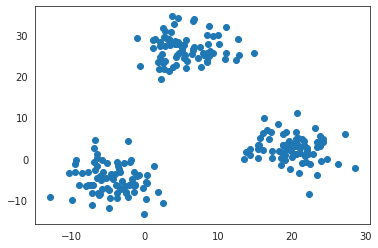

In [697]:
# Write code here
data = pd.read_csv("kmc-data1.csv")
data_arr = data.to_numpy()
x = data_arr[:,0]
y = data_arr[:,1]
plt.scatter(x,y)

**(1b) Consider the case where K=1. Take centre as $[6.67,8.33]$ and calculate Within Cluster Sum of Squares (WCSS)**

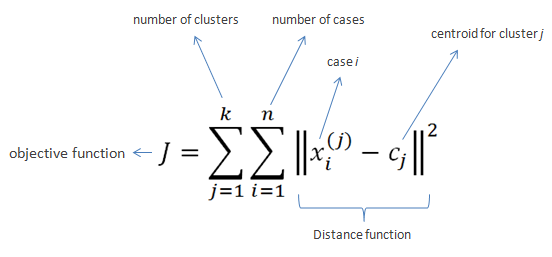

In [698]:
# Write code here
centroid = [6.67,8.33]
J = np.linalg.norm(x-centroid[0])**2 + np.linalg.norm(y-centroid[1])**2
print("Cost fn", J)

Cost fn 73141.51707384619


In [699]:
np.linalg.norm(x-y)**2

65550.29876262994

**(1c) Write a function to find which class each point belongs to given the centroids and value of K**

Hint: data has dimensions (m x n), centroids has dimensions (K x n)

In [700]:
import numpy as np
def get_class(data,centroids,K):
    size = data.shape[0]
    data_class = np.zeros([size]) #Create an array to store classes of each data
    #Your code here
    J = np.zeros((data.shape[0],centroids.shape[0]))
    for i in range(len(data)):
        for j in range(len(centroids)):
            J[i,j] = np.linalg.norm(data[i,:]-centroids[j,:])**2
    data_class = np.argmin(J, axis=1)
    return data_class

In [701]:
###Testing
centroids = np.array([6.67,8.33]).T
centroids = centroids[np.newaxis,:]
get_class(data_arr,centroids,1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

**(1d) Write a function to find the centroids given the data points and the corresponding class**

In [702]:
def get_centroids(data,data_class,K):
    dim = data.shape[1] #The number of columns in data
    centroids = np.zeros((K,dim))
    #Your code here
    for k in range(K):
        centroids[k,:] = np.mean(data[data_class == k,:], axis=0)
    return centroids

In [406]:
data_class = data_class[:,np.newaxis]

In [703]:
### Testing........................
get_centroids(data_arr,data_class,1)

array([[7.10578427, 8.05544911]])

**(1e) Write a function to calculate WCSS given the data points, the centroids and K** 

In [704]:
def wcss(data,centroids,K):
    wcss_clusterwise = np.zeros([K]) #Array to store WCSS of individual clusters
    data_class = get_class(data,centroids,K)
    #Your code here
    for k in range(K):
        for i in range(len(data)):
            wcss_clusterwise[k] = np.linalg.norm(data[i,:] - centroids[k,:])**2
    wcss = np.sum(wcss_clusterwise) 
    return(wcss)

In [705]:
###Testing...............
wcss(data_arr,centroids,1)

274.98179641042265

**K Means Algorithm:<br>**
    1) Allocate a class to each data point given the initial centroids<br>
    2) Calculate the new centroids,i.e, the mean of the data points in each class<br>
    3) Iterate till the stopping criteria. In our case the algorithm stops when the shift in each centroid is less than tolerance<br>
    

**(1f) Let $K = 3$ and the initial cluster centroids be $[10,30], [25,-5]$ and $[-5,10]$ and write a function to implement K-means clustering using functions defined above. Plot the final clusters with K-means clustering.<br> Take tolerance as $0.001$**

In [707]:
def kmeans(data,K,centroids,max_iter):
    # Write code here
    for i in range(max_iter):
        data_class = get_class(data,centroids,K)
        wcss_old = wcss(data,centroids,K)
        new_centroids = get_centroids(data,data_class,K)
        wcss_new = wcss(data,new_centroids,K)
        centroids = new_centroids
        if np.linalg.norm(new_centroids - centroids) < 10**(-3):
            break
        if (wcss_new - wcss_old) < 10**(-4):
            break
    return new_centroids, wcss_new

**(1g) Compute the sum of square distance of each point from the cluster centroid.**

In [708]:
def compute_distance(data,centroids,K):    
    distance = np.zeros(data.shape[0])
    labels = get_class(data,centroids,K)
    for i in range(len(data)):
        distance[i] = np.linalg.norm(data[i] - centroids[labels[i]])
    return np.sum(distance)

**(1h) Repeat the above exercise for $K = 1,2,3,4$. You can use appropriate initial centroids based on the visualization**

**Plot the final clusters (for $K = 1,2,3,4$) and report the sum of square distance of each point from the cluster mean. Give your observations.**

Sum of squared distance of each point from cluster centroid 4085.936081657886


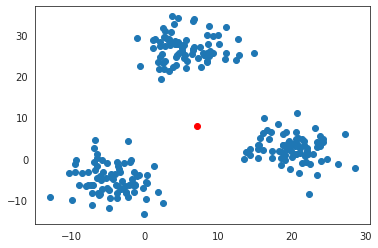

In [709]:
#  Write code here
centroids = np.array([[9,9]])
K = 1
new_centroids,wcss_new = kmeans(data_arr,K,centroids,1000)
distance = compute_distance(data_arr,new_centroids,K)
print("Sum of squared distance of each point from cluster centroid",distance)
plt.scatter(x,y)
plt.plot(new_centroids[0,0],new_centroids[0,1],"ro")

Sum of squared distance of each point from cluster centroid 2725.804647137405


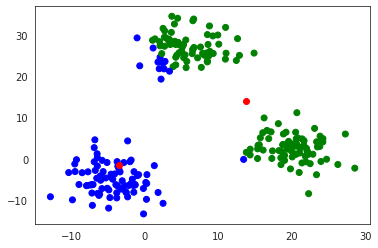

In [717]:
#  Write code here
centroids = np.array([[0,10],[15,17]])
K = 2
new_centroids,wcss_new = kmeans(data_arr,K,centroids,1000)
distance = compute_distance(data_arr,new_centroids,K)
label = get_class(data_arr,centroids,K)
colors = ['blue','green']
print("Sum of squared distance of each point from cluster centroid",distance)
plt.scatter(x,y,c = label, cmap=matplotlib.colors.ListedColormap(colors))
plt.plot(new_centroids[0,0],new_centroids[0,1],"ro")
plt.plot(new_centroids[1,0],new_centroids[1,1],"ro")

Sum of squared distance of each point from cluster centroid 953.6049351631666


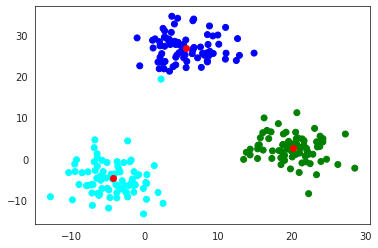

In [721]:
#  Write code here
centroids = np.array([[10,30],[25,-5],[-5,10]])
K = 3
new_centroids,wcss_new = kmeans(data_arr,K,centroids,1000)
distance = compute_distance(data_arr,new_centroids,K)
label = get_class(data_arr,centroids,K)
print("Sum of squared distance of each point from cluster centroid",distance)
colors = ['blue','green','cyan']
plt.scatter(x,y,c = label, cmap=matplotlib.colors.ListedColormap(colors))
plt.plot(new_centroids[0,0],new_centroids[0,1],"ro")
plt.plot(new_centroids[1,0],new_centroids[1,1],"ro")
plt.plot(new_centroids[2,0],new_centroids[2,1],"ro")

Sum of squared distance of each point from cluster centroid 903.17097916633


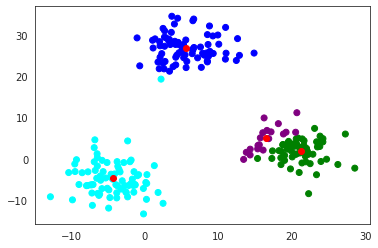

In [722]:
#  Write code here
centroids = np.array([[10,30],[25,-5],[-5,10],[10,10]])
K = 4
new_centroids,wcss_new = kmeans(data_arr,K,centroids,1000)
distance = compute_distance(data_arr,new_centroids,K)
label = get_class(data_arr,centroids,K)
print("Sum of squared distance of each point from cluster centroid",distance)
colors = ['blue','green','cyan','purple']
plt.scatter(x,y,c = label, cmap=matplotlib.colors.ListedColormap(colors))
plt.plot(new_centroids[0,0],new_centroids[0,1],"ro")
plt.plot(new_centroids[1,0],new_centroids[1,1],"ro")
plt.plot(new_centroids[2,0],new_centroids[2,1],"ro")
plt.plot(new_centroids[3,0],new_centroids[3,1],"ro")

Text(0.5, 1.0, 'Elbow plot')

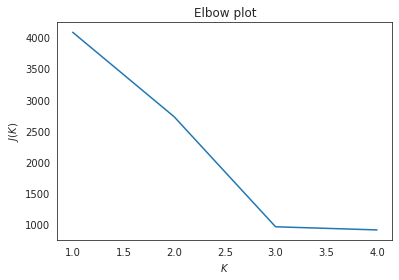

In [568]:
K_axis = [1,2,3,4]
J_axis = [4085.936081657886,2725.804647137405,953.6049351631666,903.17097916633]
plt.plot(K_axis,J_axis)
plt.xlabel("$K$")
plt.ylabel("$J(K)$")
plt.title("Elbow plot")

Observations: K = 3 seems to be a good choice for this problem as the error doesn't decrease much after that

**(2a) Load the data from the file 'kmc-data2.csv' and visualize the data on a scatter plot.**

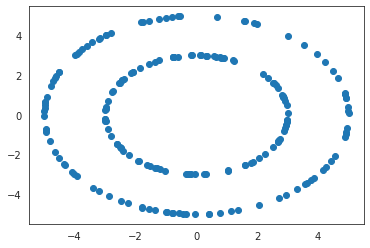

In [727]:
#  Write code here
data2 = pd.read_csv("kmc-data2.csv")
data2_arr = data2.to_numpy()
X = data2_arr[:,0]
Y = data2_arr[:,1]
plt.scatter(X,Y)

**(2b) Cluster the data with K-means clustering. Consider $K = 2$. (You can use scikit-learn library for to perform clustering)**

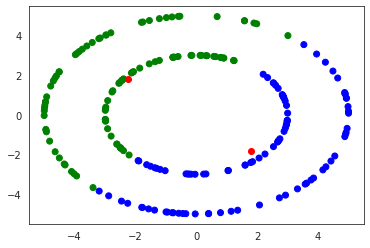

In [753]:
#  Write code here
kmeans = KMeans(n_clusters=2, random_state=0).fit(data2)
new_centroids = kmeans.cluster_centers_
labels = kmeans.labels_
colors = ['green','blue']
plt.scatter(X,Y,c = labels, cmap=matplotlib.colors.ListedColormap(colors))
plt.plot(new_centroids[0,0],new_centroids[1,0],"ro")
plt.plot(new_centroids[1,0],new_centroids[1,1],"ro")

**(2c) Suppose you want to identify two ring clusters as visualised in the scatter plot. Now, transform the data such that K-means clustering identifies the two ring clusters.**

Hint: The points in the inner circle have the same radius and so do the points on the outer circle. This can be an effective way to cluster those points. Now think of transforming the 2D data to 1D data and then cluster.

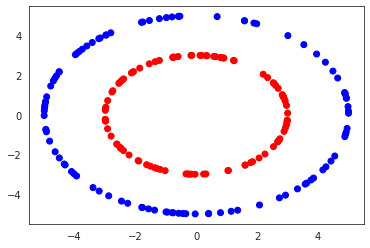

In [750]:
#  Write code here

r = np.linalg.norm(data2, axis = 1)
kmeans = KMeans(n_clusters=2)
data3 = r[:,np.newaxis]
label = kmeans.fit_predict(data3)
colors = ['blue','red']
plt.scatter(X,Y,c = label, cmap=matplotlib.colors.ListedColormap(colors))

**(3) Perform K-means clustering on Bank note dataset (attached) which is a classification dataset. Split the data into test and train (80:20 ratio with random seed=0). Perform clustering on the training data and predict labels for test data based on the clusters obtained. Compare the predictions with actual labels and report accuracy. (You can use scikit-learn library for K-means and train-test split and accuracy)**

In [788]:
#  Write code here
np.random.seed(0)
bank_data = pd.read_csv("data_banknote_authentication.csv")
bank_data.head()
bank_arr = bank_data.to_numpy()
X_bank = bank_arr[:,0:4]
X_train, X_test, y_train, y_test = train_test_split(X_bank, y_bank, test_size=0.2, random_state=42)
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_train)
label = kmeans.fit_predict(X_test)
score = float(sum(label == y_test))/ float(len(y_test))
print("Accuracy:",score*100)

Accuracy: 39.63636363636363


K means has poor accuracy in the case of multi-dimensional data

## Logistic Regression

In [687]:
r = np.round(r)
r.astype(int)
X = X[:,np.newaxis]
Y = Y[:,np.newaxis]

Logistic Regression uses the sigmoid function for binary classification. 

**(4a) Plot the sigmoid function $\frac{1}{1+e^{-x}}$ for x in the range [-20,20] at 100 equally spaced values. This exercise will help you understand the shape of the sigmoid function and show its relevance in binary classification problems**

Text(0.5, 1.0, 'Sigmoid fn')

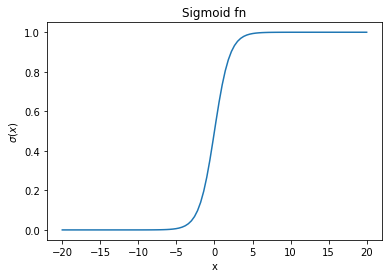

In [3]:
# Code here
x = np.linspace(-20,20,100);
f = 1/(1+np.exp(-x));   
plt.plot(x,f);
plt.xlabel('x');
plt.ylabel("$\sigma(x)$");
plt.title("Sigmoid fn")

**(4b) Comment on the nature of the sigmoid function graph (specifically : domain,range,behaviour in extreme inputs).**

#Answer here
Properties of sigmoid:
1. Output range : Between -1 and 1 
2. Centered around 0 (Introduces symmetry while learning params)
3. Saturates when x is large either on the positive or the negative side (negative effect on gradient descent)

**(4c) Using the derivative formula of sigmoid function, plot the gradients of the sigmoid function for the 100 values in the range [-20,20].**

Text(0.5, 1.0, 'Derivative of sigmoid fn')

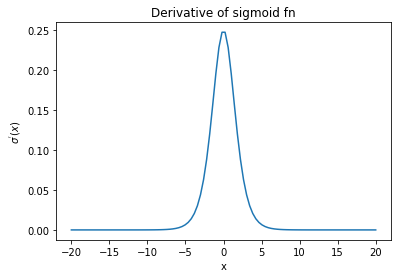

In [4]:
# Code here
deriv = f*(1-f);
plt.plot(x,deriv);
plt.xlabel('x');
plt.ylabel("$\sigma^{'}(x)$");
plt.title("Derivative of sigmoid fn")

**Consider the given data X_logistic.txt and y_logistic.txt. Perform random shuffle and then split the data as train-validation-test sets in the ratio of 80:10:10. Note that the y value gives the class label (0 or 1).** 

**(5a) Implement logistic regression (using only numpy) to predict whether the test datapoints belong to class 0 or 1. Gradient descent also has to be implemented using numpy. Choose the best learning rate parameter between 0.001, 0.01, 0.1 and the number of iterations between 50, 100 and 1000 by using validation dataset. Using the chosen model (best learning rate and number of iterations), report the prediction accuracy on test data. Use a random initialization of weights.**



In [220]:
# Code here
#Loading data..................
X = np.loadtxt("X_logistic.txt")
y = np.loadtxt("y_logistic.txt")
y = y[:,np.newaxis]

In [221]:
shuffler = np.random.permutation(len(X))
X_shuffled = X[shuffler]
y_shuffled = y[shuffler]

In [222]:
X_train = X_shuffled[0:80,:]
y_train = y_shuffled[0:80,:]
X_val = X_shuffled[80:90,:]
y_val = y_shuffled[80:90,:]
X_test = X_shuffled[90:100,:]
y_test = y_shuffled[90:100,:]

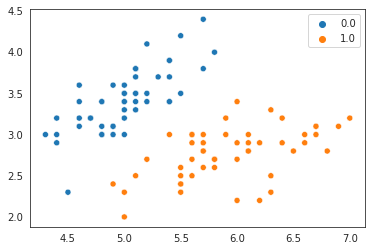

In [223]:
sns.set_style('white')
sns.scatterplot(X_shuffled[:,0],X_shuffled[:,1],hue=y_shuffled.reshape(-1));

In [224]:
### Cost fn:

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def deriv(x):
    return sigmoid(x)*(1-sigmoid(x))

def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X,theta))
    epsilon = 1e-5 #To avoid num errors
    cost = (1/m)*((np.dot((-y).T,np.log(h + epsilon)))-(np.dot((1-y).T,np.log(1-h + epsilon))))
    return cost

def gradient_descent(X, y, params, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros((iterations,1))

    for i in range(iterations):
        params = params - (learning_rate/m) *(np.dot(X.T,(sigmoid(np.dot(X,params))) - y))
        cost_history[i] = compute_cost(X, y, params)
    return (cost_history, params)

In [226]:
### Run gradient descent:

np.random.seed(10)

m = len(y_train)
m2 = int(len(y)/10)

X_train = np.hstack((np.ones((m,1)),X_train))
X_val = np.hstack((np.ones((m2,1)),X_val))
X_test = np.hstack((np.ones((m2,1)),X_test))
n = np.size(X,1)
params = np.random.random((n+1,1))

In [227]:
def predict(X, theta):
    return np.round(sigmoid(np.dot(X,theta)))

Initial Cost is: [[1.4967805]] 

Optimal Parameters are: 
 [[-0.16504185]
 [ 2.96236555]
 [-5.10598621]] 



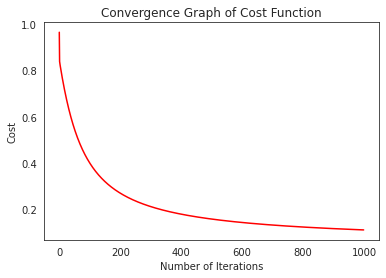

Validation score:  1.0


In [235]:
iterations = 1000
learning_rate = 0.1

initial_cost = compute_cost(X_train, y_train, params)

print("Initial Cost is: {} \n".format(initial_cost))

(cost_history, params_optimal) = gradient_descent(X_train, y_train, params, learning_rate, iterations)

print("Optimal Parameters are: \n", params_optimal, "\n")

plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()
y_pred = predict(X_val, params_optimal)
score = float(sum(y_pred == y_val))/ float(len(y_val))
print("Validation score: ", score)

Initial Cost is: [[1.4967805]] 

Optimal Parameters are: 
 [[ 0.51354833]
 [ 0.69980099]
 [-1.35132207]] 



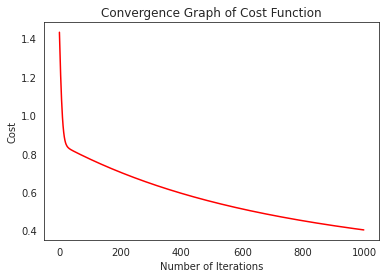

Validation score:  1.0


In [236]:
iterations = 1000
learning_rate = 0.01

initial_cost = compute_cost(X_train, y_train, params)

print("Initial Cost is: {} \n".format(initial_cost))

(cost_history, params_optimal) = gradient_descent(X_train, y_train, params, learning_rate, iterations)

print("Optimal Parameters are: \n", params_optimal, "\n")

plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()
y_pred = predict(X_val, params_optimal)
score = float(sum(y_pred == y_val))/ float(len(y_val))
print("Validation score: ", score)

Initial Cost is: [[1.4967805]] 

Optimal Parameters are: 
 [[ 0.68255061]
 [-0.19722107]
 [ 0.19365789]] 



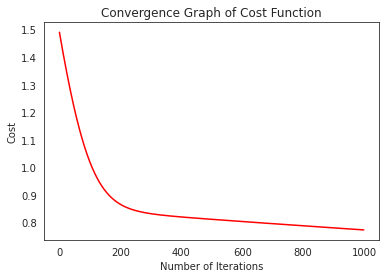

Validation score:  0.1


In [240]:
iterations = 1000
learning_rate = 0.001

initial_cost = compute_cost(X_train, y_train, params)

print("Initial Cost is: {} \n".format(initial_cost))

(cost_history, params_optimal) = gradient_descent(X_train, y_train, params, learning_rate, iterations)

print("Optimal Parameters are: \n", params_optimal, "\n")

plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()
y_pred = predict(X_val, params_optimal)
score = float(sum(y_pred == y_val))/ float(len(y_val))
print("Validation score: ", score)

Alpha = 0.1 seems to perform the best (has a smooth learning curve and high validation score. Let us now vary num_iter

Initial Cost is: [[1.4967805]] 

Optimal Parameters are: 
 [[ 0.59713577]
 [ 0.27241895]
 [-0.61939951]] 



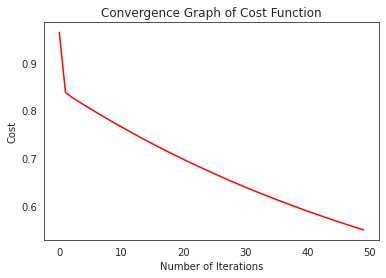

Validation score:  1.0


In [241]:
iterations = 50
learning_rate = 0.1

initial_cost = compute_cost(X_train, y_train, params)

print("Initial Cost is: {} \n".format(initial_cost))

(cost_history, params_optimal) = gradient_descent(X_train, y_train, params, learning_rate, iterations)

print("Optimal Parameters are: \n", params_optimal, "\n")

plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()
y_pred = predict(X_val, params_optimal)
score = float(sum(y_pred == y_val))/ float(len(y_val))
print("Validation score: ", score)

Initial Cost is: [[1.4967805]] 

Optimal Parameters are: 
 [[ 0.51320934]
 [ 0.70194513]
 [-1.35500892]] 



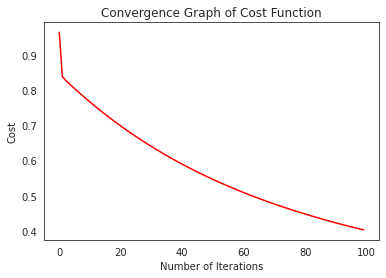

Validation score:  1.0


In [242]:
iterations = 100
learning_rate = 0.1

initial_cost = compute_cost(X_train, y_train, params)

print("Initial Cost is: {} \n".format(initial_cost))

(cost_history, params_optimal) = gradient_descent(X_train, y_train, params, learning_rate, iterations)

print("Optimal Parameters are: \n", params_optimal, "\n")

plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()
y_pred = predict(X_val, params_optimal)
score = float(sum(y_pred == y_val))/ float(len(y_val))
print("Validation score: ", score)

Initial Cost is: [[1.4967805]] 

Optimal Parameters are: 
 [[-0.16504185]
 [ 2.96236555]
 [-5.10598621]] 



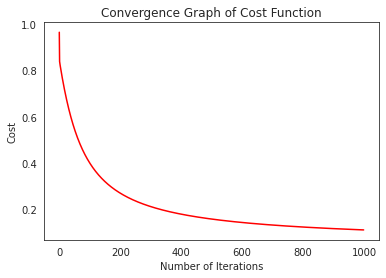

Validation score:  1.0


In [243]:
iterations = 1000
learning_rate = 0.1

initial_cost = compute_cost(X_train, y_train, params)

print("Initial Cost is: {} \n".format(initial_cost))

(cost_history, params_optimal) = gradient_descent(X_train, y_train, params, learning_rate, iterations)

print("Optimal Parameters are: \n", params_optimal, "\n")

plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()
y_pred = predict(X_val, params_optimal)
score = float(sum(y_pred == y_val))/ float(len(y_val))
print("Validation score: ", score)

Hyperparams based on validation SET: alpha = 0.1, num_iter = 1000

In [245]:
# Report accuracy (Test set)
y_pred = predict(X_test, params_optimal)
score = float(sum(y_pred == y_test))/ float(len(y_test))
print("Accuracy",score*100)

Accuracy 100.0


**(5b) Plot the logistic regression classifier (decision boundary) on a 2d plot and include the train and test datapoints on the plot in different colours.
(Say dark green for class 0 test datapoints and dark red for class 1 test datapoints. Similarly, light green and light red for train datapoints).**

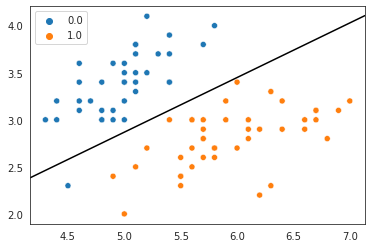

In [255]:
### Training data classification

# Code here
slope = -(params_optimal[1] / params_optimal[2])
intercept = -(params_optimal[0] / params_optimal[2])

sns.set_style('white')
sns.scatterplot(X_train[:,1],X_train[:,2],hue=y_train.reshape(-1));
ax = plt.gca()
ax.autoscale(False)
x_vals = np.array(ax.get_xlim())
y_vals = intercept + (slope * x_vals)
plt.plot(x_vals, y_vals, c="k");
plt.show()

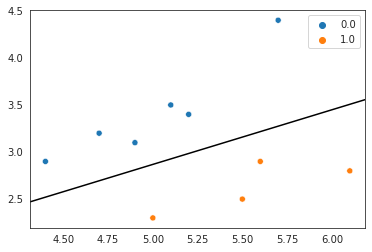

In [256]:
###Test data classification


# Code here
slope = -(params_optimal[1] / params_optimal[2])
intercept = -(params_optimal[0] / params_optimal[2])

sns.set_style('white')
sns.scatterplot(X_test[:,1],X_test[:,2],hue=y_test.reshape(-1));
ax = plt.gca()
ax.autoscale(False)
x_vals = np.array(ax.get_xlim())
y_vals = intercept + (slope * x_vals)
plt.plot(x_vals, y_vals, c="k");
plt.show()

**(6) Consider the bank note dataset provided. Perform random shuffle and train-test split(80:20). Using sklearn, implement logistic regression to predict whether the test datapoints belong to class 0 or 1. Report the prediction accuracy on test data.**

In [290]:
# Code here
data = pd.read_csv("data_banknote_authentication.csv")
data.head()

,3.6216,8.6661,-2.8073,-0.44699,0
0,4.54590,8.1674,-2.4586,-1.46210,0
1,3.86600,-2.6383,1.9242,0.10645,0
2,3.45660,9.5228,-4.0112,-3.59440,0
3,0.32924,-4.4552,4.5718,-0.98880,0
4,4.36840,9.6718,-3.9606,-3.16250,0


In [292]:
data_arr = data.to_numpy()

In [302]:
X = data_arr[:,0:4]
y = data_arr[:,4]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

LogisticRegression()

In [305]:
# Report accuracy here
# Use score method to get accuracy of model
score = logisticRegr.score(X_test, y_test)
print(score*100)

98.18181818181819
